<a href="https://colab.research.google.com/github/azimsarker09/Customer-Segmentation/blob/main/Customer_Segmentaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Introduction

Customer segmentation is a powerful marketing strategy that enables businesses to identify and categorize customers based on their characteristics and behaviors. In this project, we utilize unsupervised machine learning techniques, specifically K-Means clustering, to segment customers from a marketing dataset. The analysis involves:

Data cleaning and preprocessing

Exploratory Data Analysis (EDA)

Dimensionality reduction using t-SNE and PCA

Clustering using K-Means

Interpretation and visualization of segment profiles

This approach helps businesses tailor their marketing strategies, improve customer satisfaction, and increase profitability by understanding the needs of different customer groups.

# 🧰 Tools & Libraries:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

We begin by importing all necessary libraries required for data analysis, visualization, preprocessing, and machine learning.

- **Pandas, NumPy** for data handling
- **Matplotlib, Seaborn, Plotly** for data visualization
- **Scikit-learn** for preprocessing, clustering (KMeans), and dimensionality reduction (PCA)
- **Warnings** are ignored for cleaner output


## 📥 Load Dataset

In [2]:
data = pd.read_csv('/content/new.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


We load the customer dataset from the CSV file using `pandas`.  
This dataset will be used for customer segmentation analysis.

- `data.head()` shows the first five rows of the dataset to get an initial overview.


## 📐 Dataset Dimensions

In [3]:
data.shape

(2240, 29)

We use `.shape` to check the number of rows and columns in the dataset.

- Rows represent individual customers.
- Columns represent various features such as demographics, spending behavior, etc.


## 🧾 Dataset Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The `.info()` method provides a concise summary of the dataset, including:

- Number of non-null entries per column
- Data types of each column
- Memory usage

This helps identify missing values and the need for data type conversions (e.g., converting date columns).


## 📊 Descriptive Statistics

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


We use `.describe().T` to view the summary statistics of all numerical features.  
This includes:

- Count, Mean, Std (Standard Deviation)
- Minimum and Maximum values
- 25%, 50%, and 75% percentiles

This helps identify outliers, data ranges, and potential issues in the dataset.


## 🔍 Visualizing Missing Values

<Axes: >

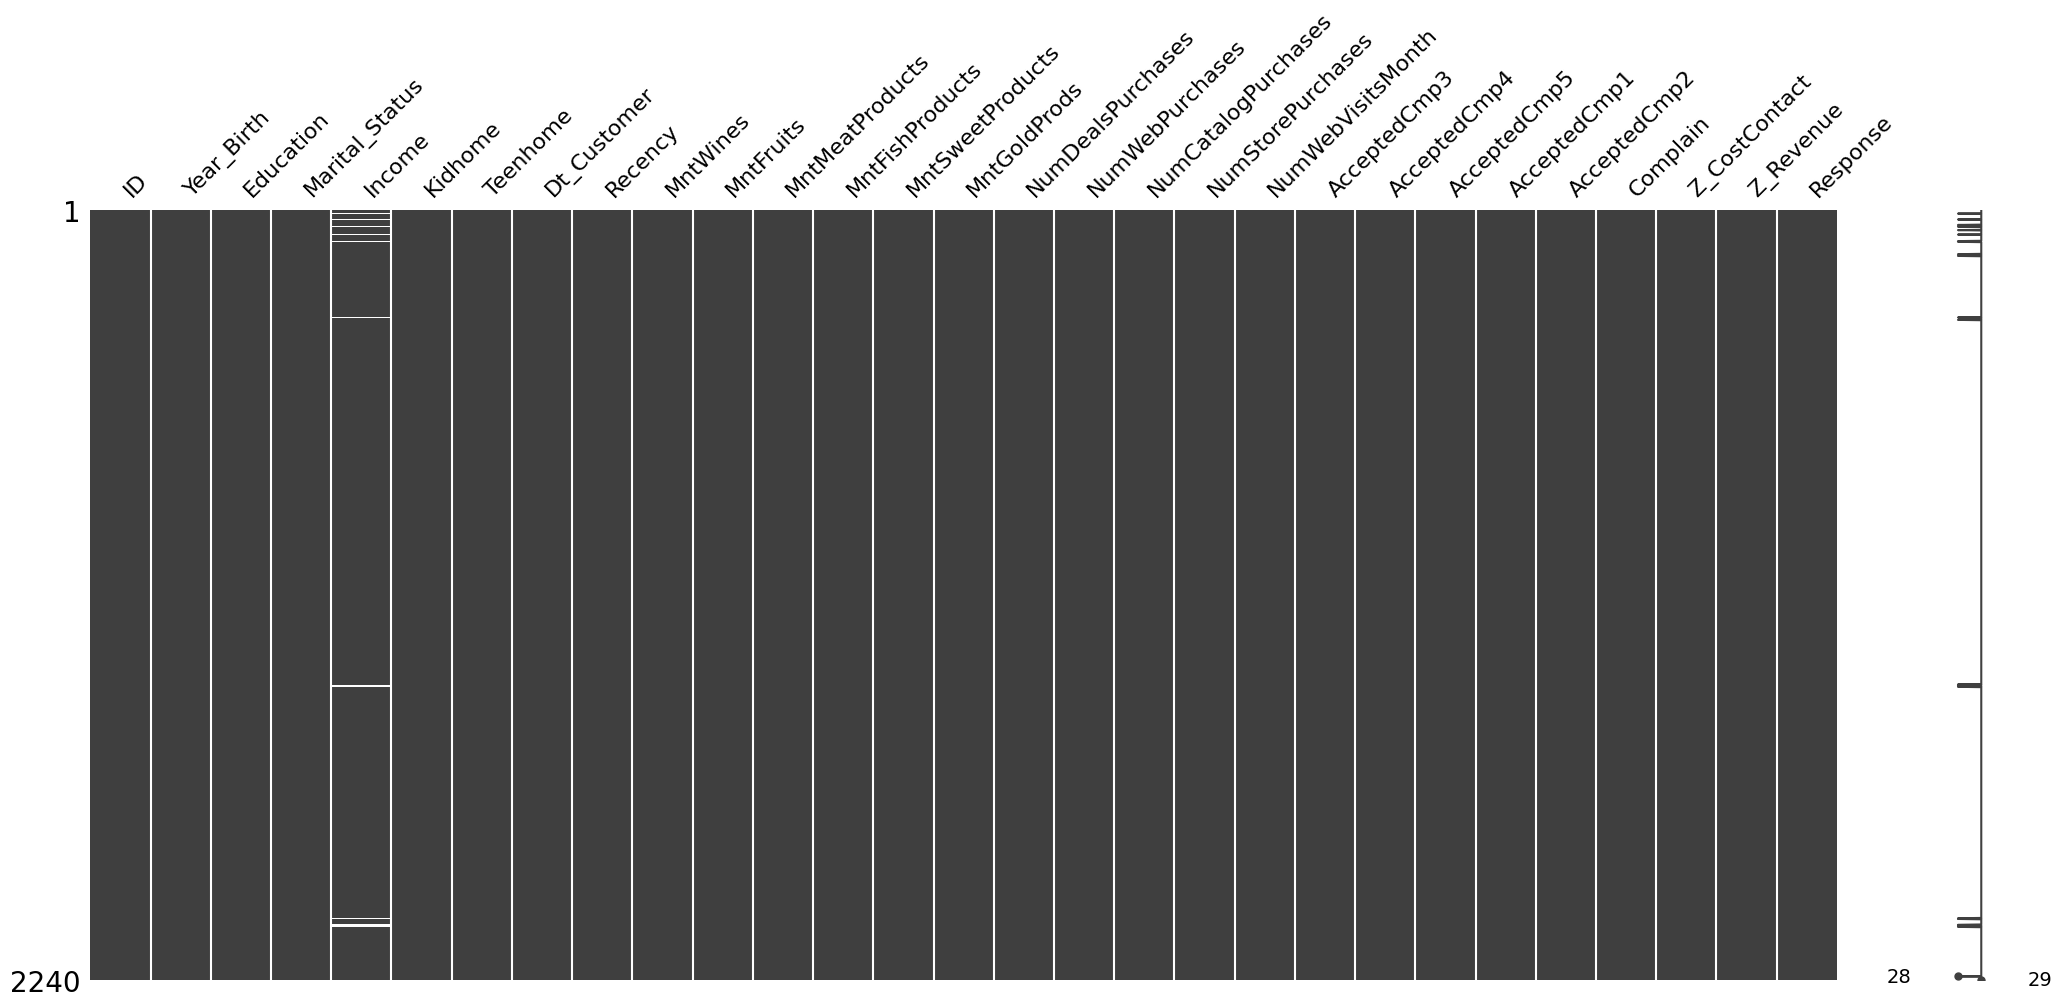

In [6]:
import missingno as msno
msno.matrix(data)

We use the `missingno` library to visualize missing data patterns in the dataset.

- `msno.matrix(data)` generates a heatmap-style bar plot.
- It visually indicates the presence of missing values in each column.

This is a helpful step before deciding how to handle missing data (e.g., fill, drop).


## 📌 Checking Missing Values (Column-wise)


In [7]:
for col in data.columns:
  temp = data[col].isnull().sum()
  if temp > 0:
    print(f'Column{col} contains {temp} null values')

ColumnIncome contains 24 null values


We loop through each column and print the number of missing values (if any).

This step helps us pinpoint which columns need missing value treatment.


## 🧹 Dropping Missing Values

In [8]:
data = data.dropna()
print('Total values in  the dataset after removing the null values:', len(data))

Total values in  the dataset after removing the null values: 2216


We remove all rows containing missing values using `dropna()`.

- This is a simple and clean way to handle missing data.
- It's effective when the number of missing rows is relatively small and won't impact model performance significantly.

We also check the number of remaining rows in the dataset after removal.


## 🔢 Unique Values per Column

In [9]:
data.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


We use `.nunique()` to find the number of unique values in each column.  
This helps identify:

- Categorical features
- Continuous/numeric features
- Columns with only one value (not useful for analysis)


## 🗓️ Extracting Date Components

In [10]:
parts = data["Dt_Customer"].str.split("-", n=3, expand=True)
data['Day']=parts[2].astype('int')
data['Month']=parts[1].astype('int')
data['Year']=parts[0].astype('int')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Day,Month,Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,2014,1,19


We split the `Dt_Customer` column into separate components:

- **Day**
- **Month**
- **Year**

This helps in analyzing customer behavior over time and can also be used to calculate the customer tenure.


## 🗑️ Dropping Unnecessary Columns

In [11]:
data.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

We remove the following columns from the dataset:

- `Z_CostContact` and `Z_Revenue`: These columns contain constant values and do not contribute to model learning.
- `Dt_Customer`: The date was already split into useful components (`Day`, `Month`, `Year`), so the original column is no longer needed.

Dropping such columns helps simplify the dataset and improve model performance.


## 🧠 Separating Categorical and Numerical Columns

In [12]:
floats, objects = [], []
for col in data.columns:
  if data[col].dtype == object:
    objects.append(col)
  elif data[col].dtype == float:
    floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


We loop through all columns and classify them by data type:

- **`objects`**: Contains all columns with `object` data type (usually categorical features).
- **`floats`**: Contains all columns with `float` data type (numerical features that may need scaling).

This classification helps in applying appropriate preprocessing steps later, such as:
- Encoding categorical variables
- Scaling numerical variables


## 📊 Count Plot of Categorical Features

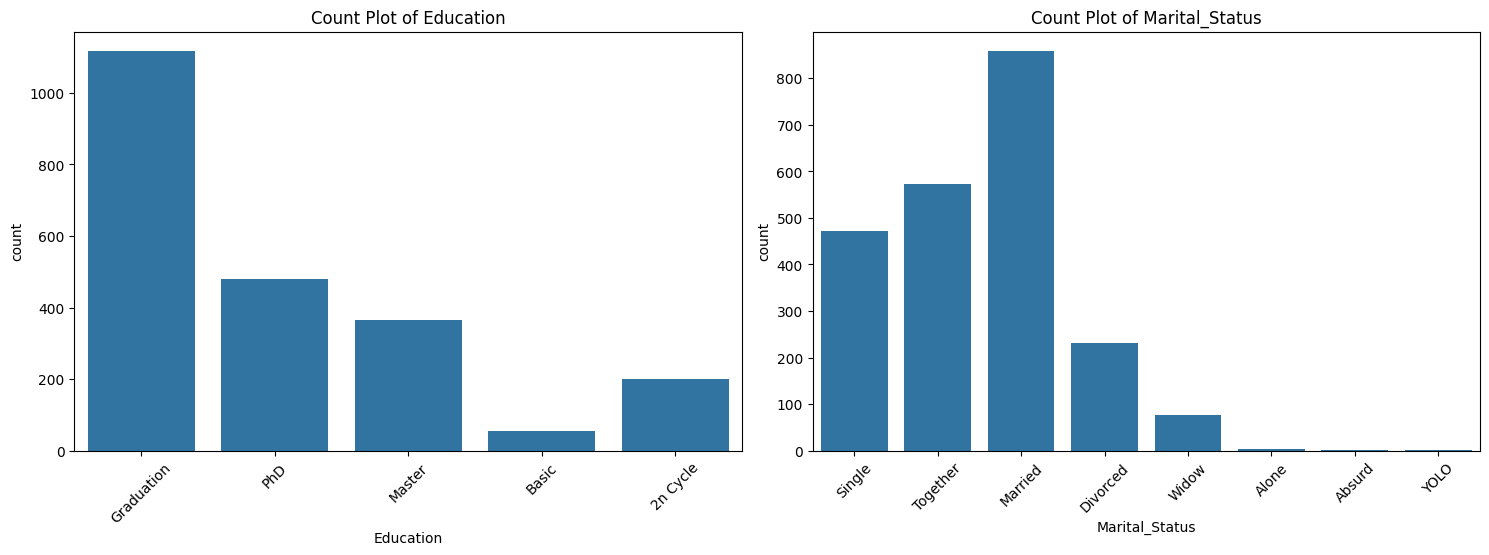

In [13]:
# Assuming 'objects' is a list of categorical columns and 'df' is your DataFrame
plt.figure(figsize=(15, 10))  # Create a figure with custom size

for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)  # Adjust subplot grid if len(objects) != 4
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  # Optional: rotate labels for readability

plt.tight_layout()  # Prevent overlap
plt.show()


We visualize the distribution of categorical features using `countplot`.

- Each subplot shows how frequently each category appears.
- This helps identify class imbalances or dominant categories.
- The figure size and layout are adjusted to fit multiple plots.

📌 We also rotate the x-axis labels for better readability.


## 💍 Marital Status Distribution

In [14]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


We use `.value_counts()` to check how many customers fall under each marital status category.

This helps in understanding the composition of the dataset by relationship status, which could influence spending behavior and customer segmentation.


# 🔄 Simplifying Marital Status Categories

In [15]:
data['Marital_Status'] = data['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Single',
    'Widow': 'Single',
    'YOLO': 'Single',
    'Divorced': 'Single',
    'Single': 'Single',
    'Together': 'Married',
    'Married': 'Married'
})


## 📊 Response-based Count Plots for Categorical Features

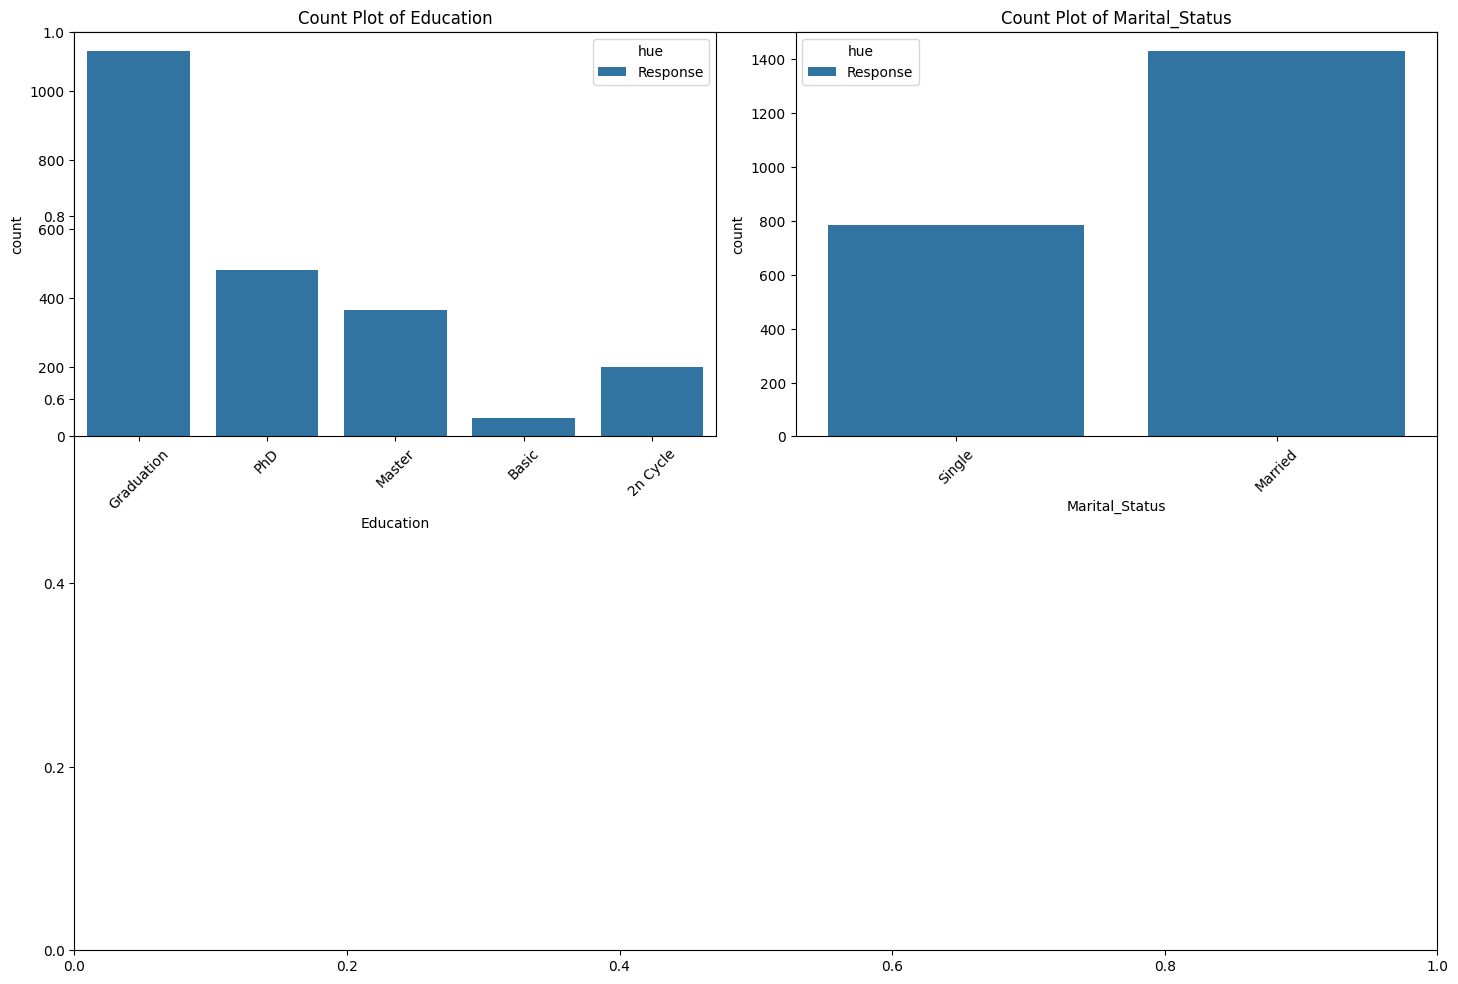

In [16]:
plt.subplots(figsize = (15,10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)

    data_melted = data.melt(id_vars=[col], value_vars=['Response'], var_name = 'hue')
    sns.countplot(data = data_melted, x = col, hue = 'hue')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We visualize each categorical feature (`objects` list) using a `countplot`, with the `Response` column as the hue.

This shows:
- The distribution of categories
- How many customers from each category responded positively (1) or negatively (0)

Such visualizations help us identify patterns and relationships between categorical features and the target variable.


## 🔢 Label Encoding of Categorical Features

In [17]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
  if data[col].dtype == object:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

Machine learning models can't directly handle categorical variables. So, we use **Label Encoding** to convert all object-type features into numeric values.

Each unique category is assigned an integer label.

📌 Note:
- Label Encoding is appropriate for algorithms like **KMeans**, where we don't have a target label (unsupervised).
- For supervised tasks (e.g., classification), One-Hot Encoding might be better for non-ordinal categories.


## 🔥 Correlation Heatmap (Threshold > 0.8)

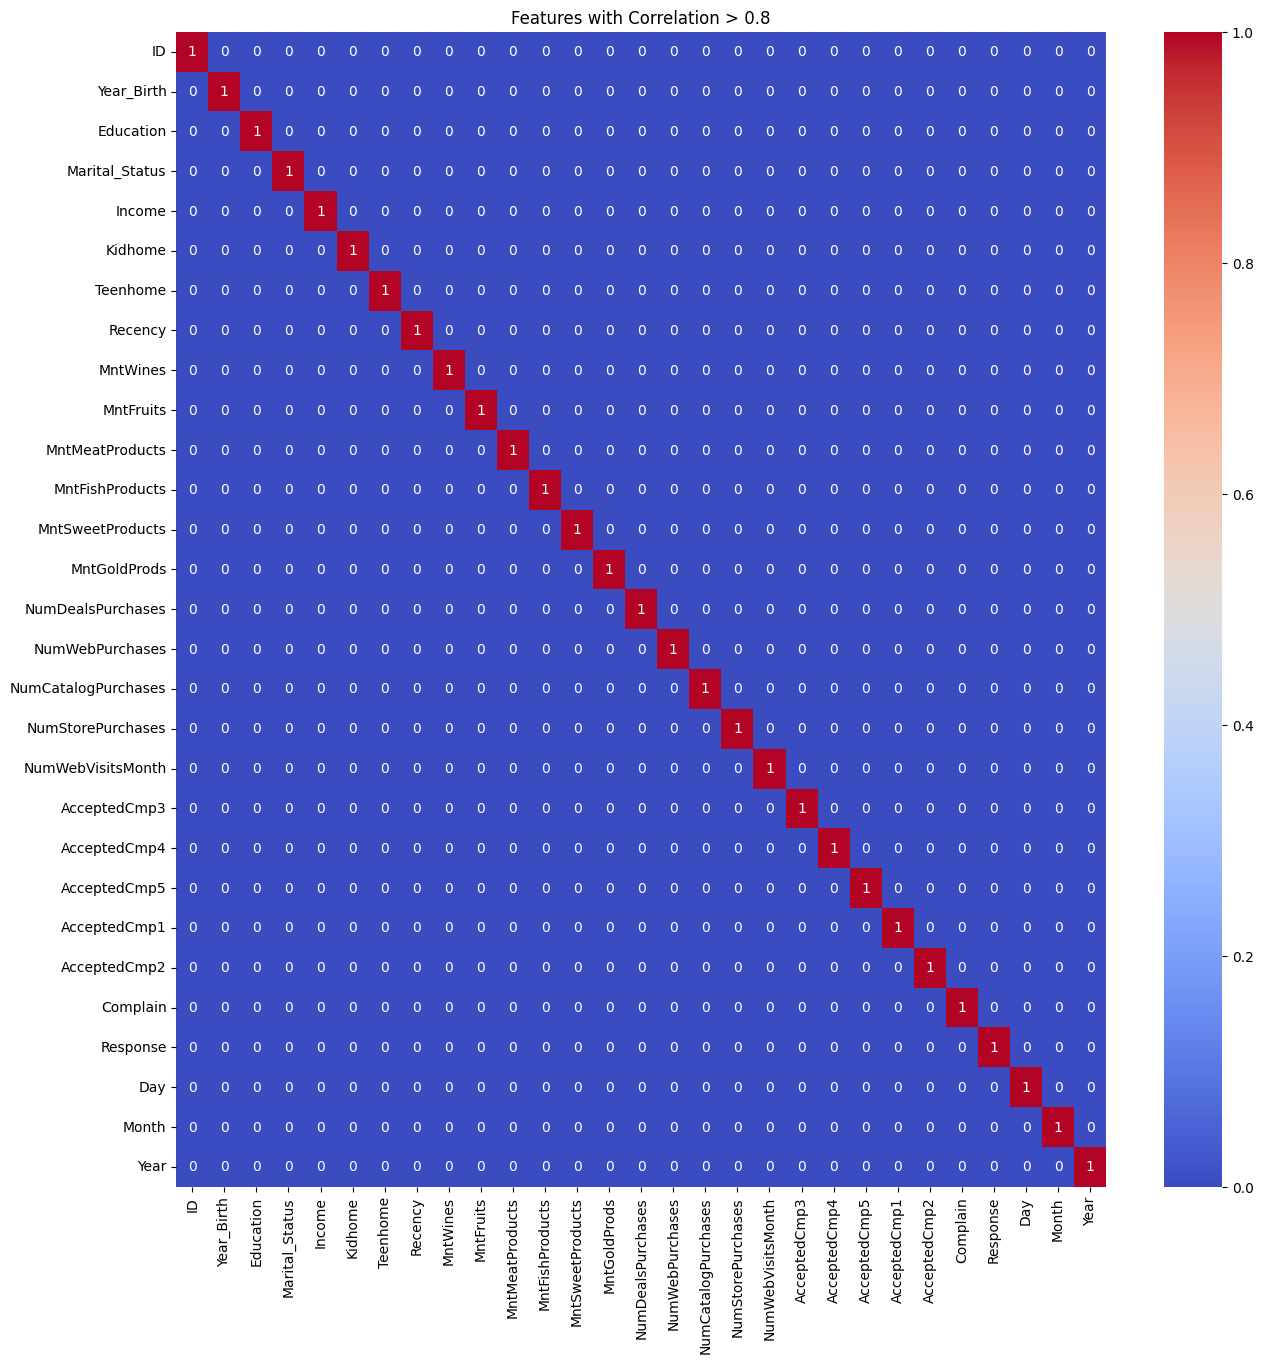

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr() > 0.8 ,annot=True, cmap='coolwarm')
plt.title("Features with Correlation > 0.8")
plt.show()

We visualize the correlation matrix to detect **highly correlated features** (correlation > 0.8).

- High correlation may indicate **feature redundancy**
- It is useful before applying **PCA** or **KMeans**, where multicollinearity can mislead the model

We use a boolean matrix (`True/False`) to highlight only strong correlations.


## 🧼 Feature Scaling using StandardScaler

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Before applying KMeans or PCA, it is essential to standardize the dataset.

- `StandardScaler` transforms the data such that each feature has **mean = 0** and **standard deviation = 1**.
- This is critical for distance-based algorithms like **KMeans**, as they are sensitive to feature scales.


## 🔍 PCA-based Visualization of Clusters

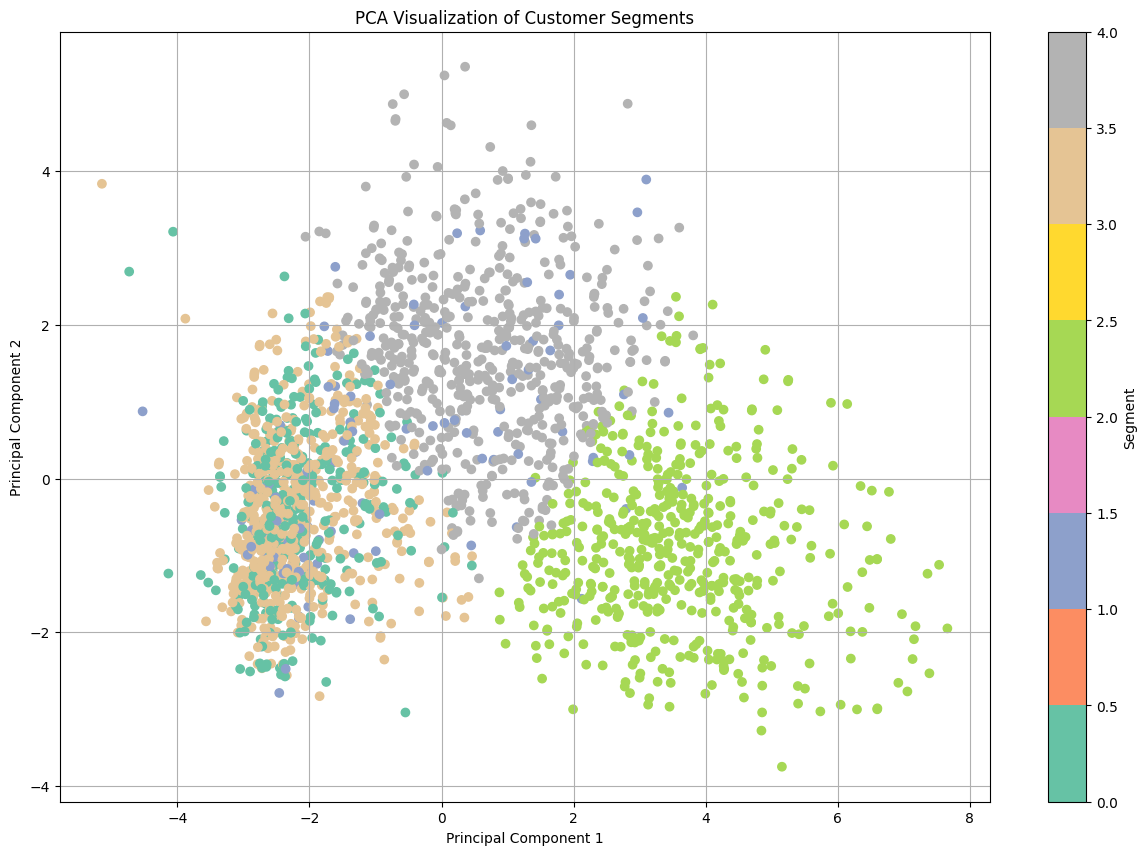

In [42]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

# Plotting the PCA result
plt.figure(figsize=(15, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=segments, cmap='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Customer Segments')
plt.colorbar(label='Segment')
plt.grid(True)
plt.show()

We use **Principal Component Analysis (PCA)** to reduce the high-dimensional dataset into two principal components. Unlike t-SNE, PCA is:

- Faster and computationally efficient
- Linearly projects data onto lower dimensions
- Good for visualizing and understanding variance

This 2D scatter plot shows how the customer segments are separated using PCA. Each dot represents a customer, and the color indicates the assigned cluster/segment.

If the clusters appear well-separated, it indicates the **KMeans model did a good job** in segmenting customers.


In [43]:
pca.explained_variance_ratio_

array([0.22592953, 0.07455521])

## 📉 Dimensionality Reduction using t-SNE

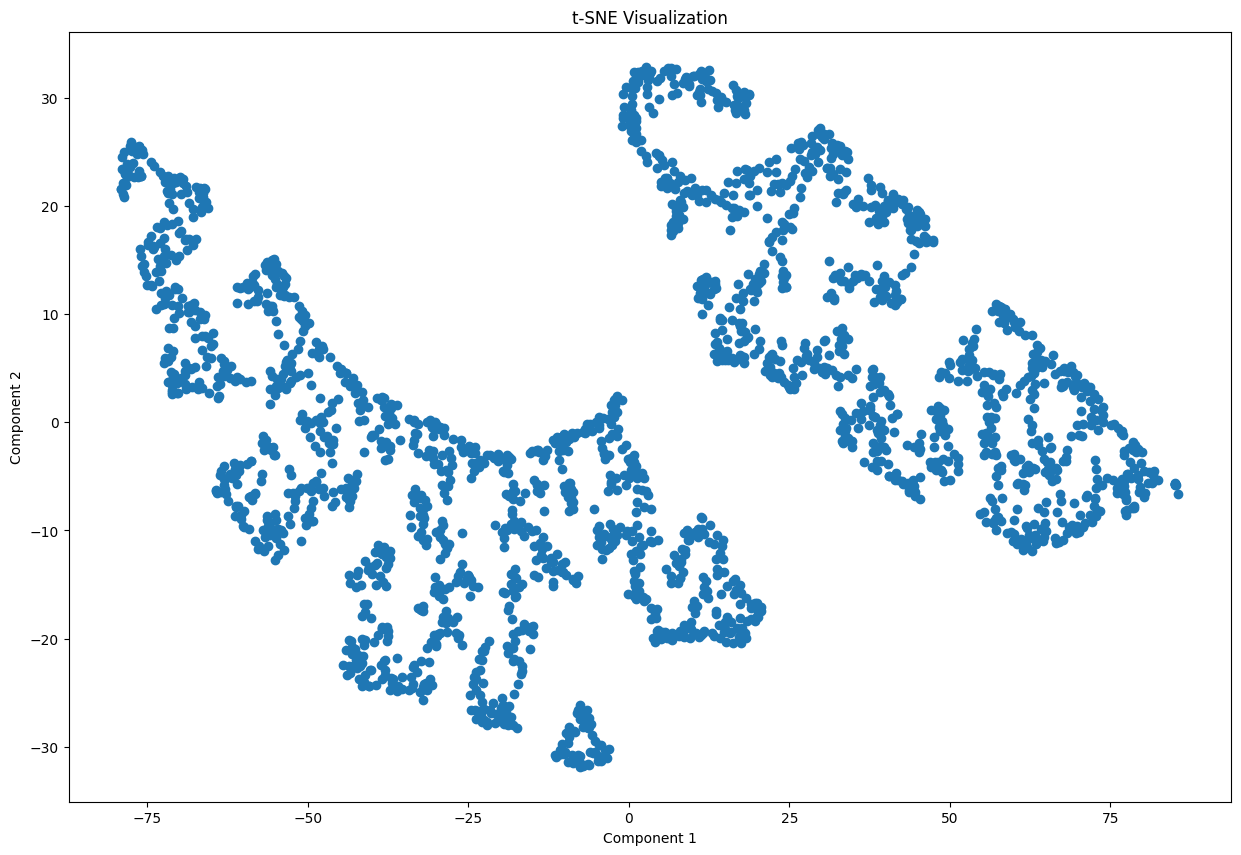

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)

plt.figure(figsize=(15, 10))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Visualization')
plt.show()

We apply **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to reduce the high-dimensional data into 2 components for visualization.

- t-SNE is a non-linear dimensionality reduction technique.
- It captures complex patterns and is especially useful for visualizing **clusters** in high-dimensional data.

The 2D scatter plot gives us an idea of how many natural groups (clusters) might exist in the dataset.


## 📈 Elbow Method with Scaled Data

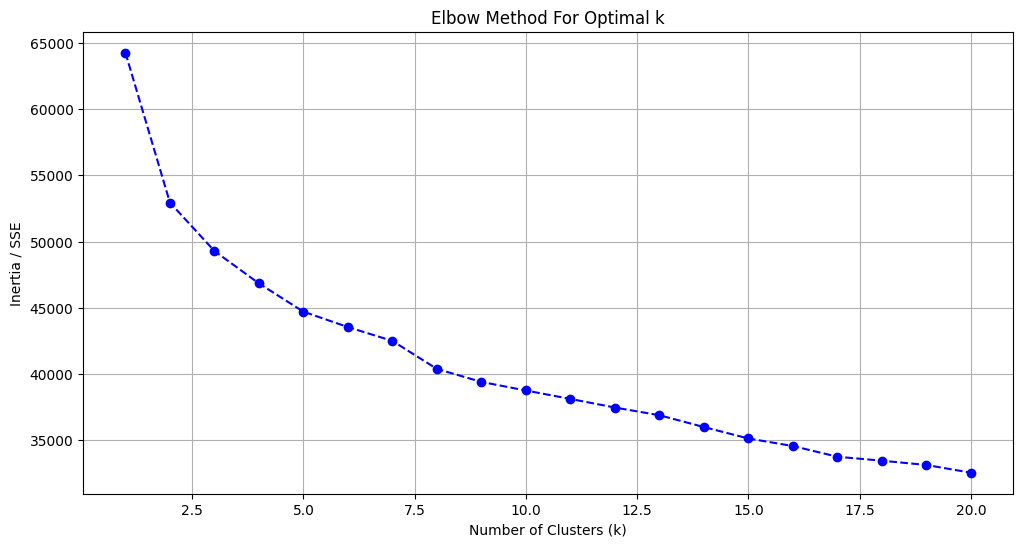

In [44]:
error = []

for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=0)
    model.fit(data_scaled)  # 🔁 Use scaled data
    error.append(model.inertia_)

# 📊 Plot the Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia / SSE')
plt.grid(True)
plt.show()


To determine the optimal number of clusters for KMeans, we use the Elbow Method on the **scaled dataset** (`data_scaled`).  
This ensures that no feature dominates the distance calculation due to scale differences.


## 🔍 KMeans Clustering

In [22]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(data_scaled)



We apply KMeans clustering on the **scaled dataset** using 5 clusters (based on the Elbow Method result).

- `init='k-means++'` helps in smart centroid initialization.
- `max_iter=500` ensures convergence.
- `fit_predict()` assigns each record to a cluster.


## 📊 t-SNE Visualization with KMeans Segments

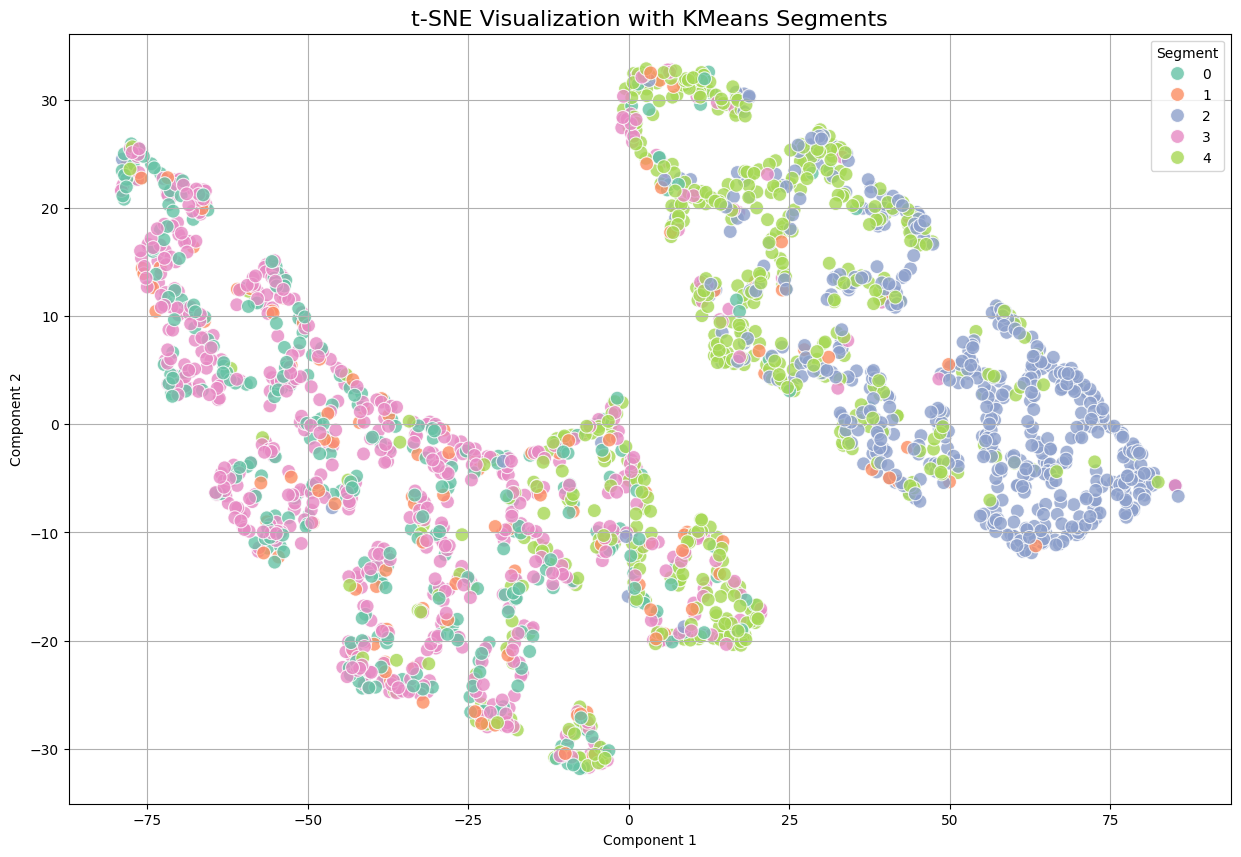

In [23]:
# Prepare data for t-SNE visualization with segments
data_tsne = pd.DataFrame({
    'x': tsne_data[:, 0],
    'y': tsne_data[:, 1],
    'segment': segments
})

# Plotting
plt.figure(figsize=(15, 10))
sns.scatterplot(x='x', y='y', hue='segment', data=data_tsne, palette='Set2', s=100, alpha=0.8)
plt.title('t-SNE Visualization with KMeans Segments', fontsize=16)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


After clustering the customers into 5 segments using KMeans, we visualize the result using **t-SNE reduced dimensions**.

- Each dot represents a customer.
- Color indicates which cluster (segment) the customer belongs to.
- Helps understand how well the clusters are **separated or overlapped** in lower-dimensional space.


In [29]:
data['Segment'] = segments

## 🧾 Cluster-wise Customer Profile Summary

In [30]:
# Group-wise mean to understand customer characteristics
segment_profile = data.groupby('Segment').mean().round(2)
segment_profile

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Day,Month,Year
Segment,,,,,,,,,,,,,,,,,,,,,
0,5509.51,1970.94,2.31,1.00,35711.21,0.78,0.46,49.68,44.99,5.92,...,0.00,0.01,0.00,0.00,0.00,0.01,0.09,2013.12,6.31,16.70
1,5136.67,1970.55,2.49,0.40,41660.97,0.60,0.51,42.15,258.56,11.56,...,1.00,0.00,0.02,0.02,0.03,0.01,0.44,2013.04,6.23,15.81
2,5697.46,1968.80,2.34,0.38,78139.81,0.04,0.14,49.34,610.19,68.81,...,0.07,0.13,0.28,0.23,0.03,0.00,0.30,2013.04,6.40,15.23
3,5638.32,1971.20,2.23,0.00,35930.34,0.77,0.46,49.66,47.12,5.41,...,0.00,0.01,0.00,0.00,0.00,0.01,0.05,2013.13,6.29,15.33
4,5575.89,1964.44,2.66,0.33,58911.01,0.20,0.93,49.06,481.66,25.98,...,0.00,0.15,0.01,0.03,0.01,0.01,0.10,2012.84,6.87,15.75


## 🧾 Cluster-wise Customer Profile Summary

This table shows the **average characteristics** of each customer segment:

- Helps us understand how each segment behaves differently.
- Can be used to target marketing strategies.


## 💰 Average Income per Segment

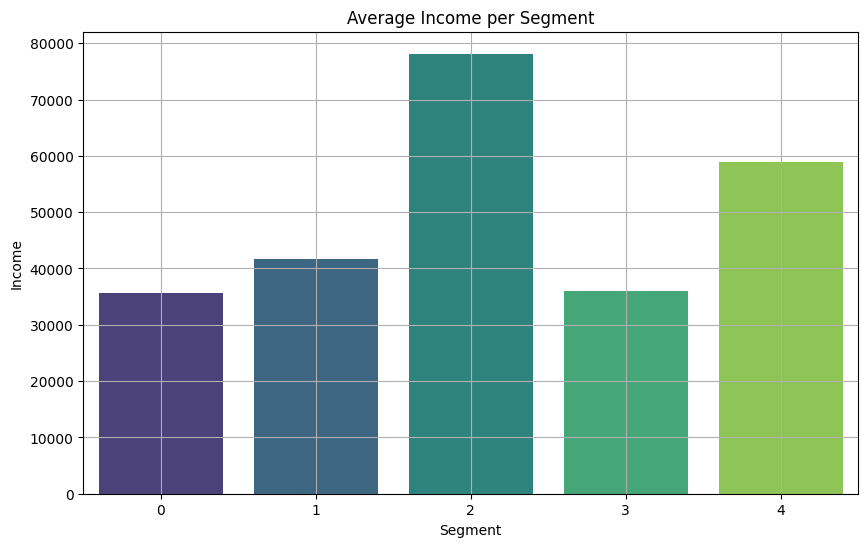

In [40]:
# Example: Average Income per Segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_profile.index, y=segment_profile['Income'], palette='viridis')
plt.title('Average Income per Segment')
plt.xlabel('Segment')
plt.ylabel('Income')
plt.grid(True)
plt.show()


This bar chart visualizes the **average income** of customers in each segment. It helps us identify which group of customers has the highest or lowest income level, which is very useful for targeted marketing strategies.


## 📊 Average Feature Values per Customer Segment

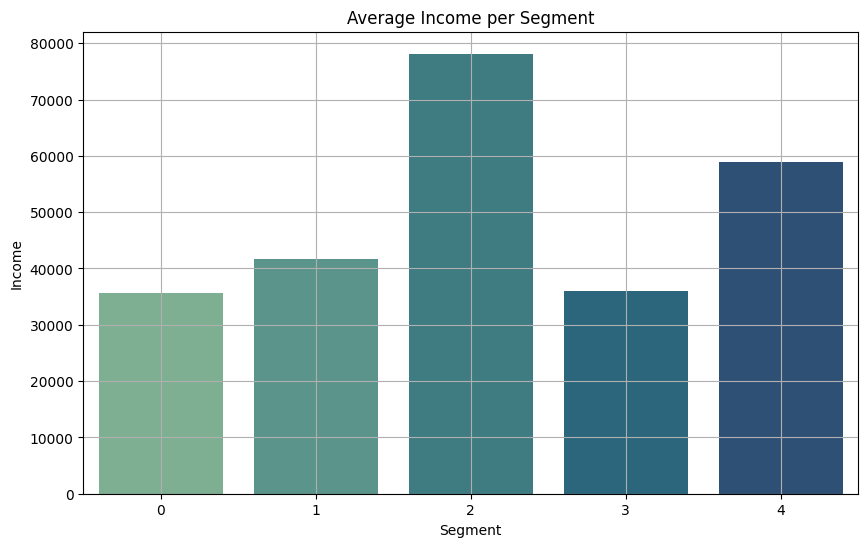

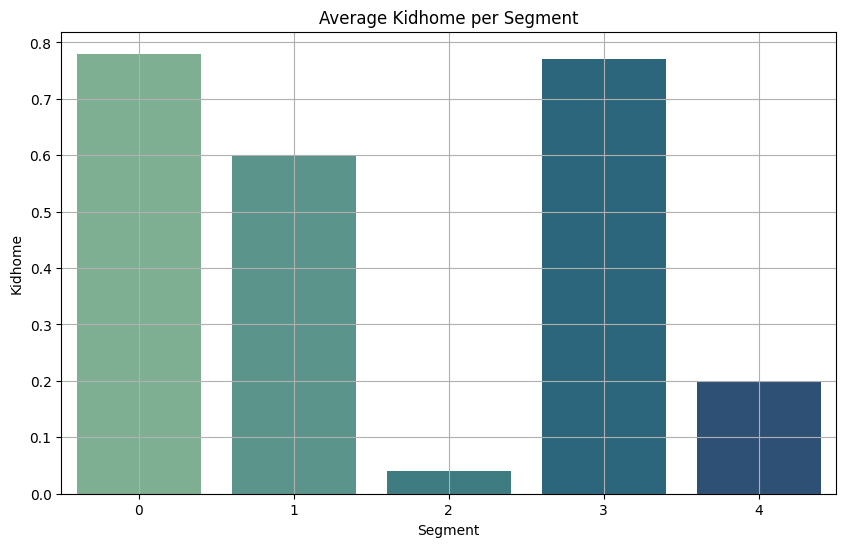

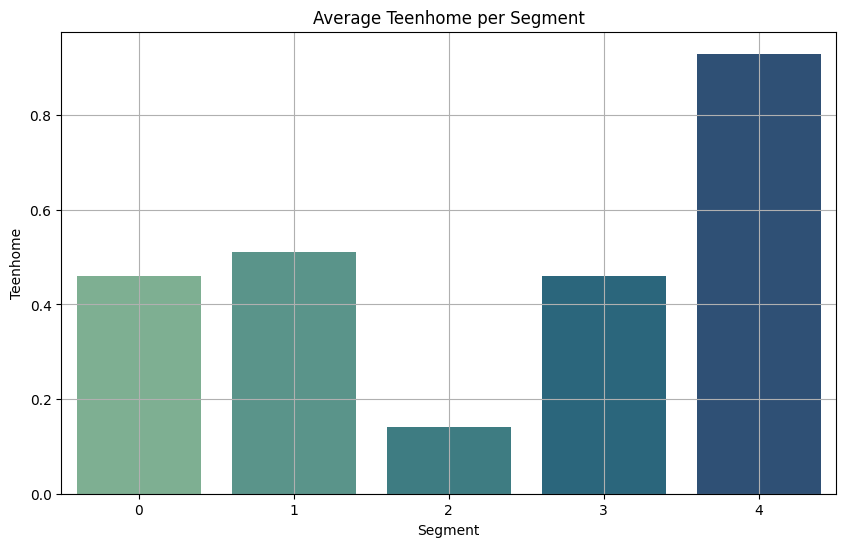

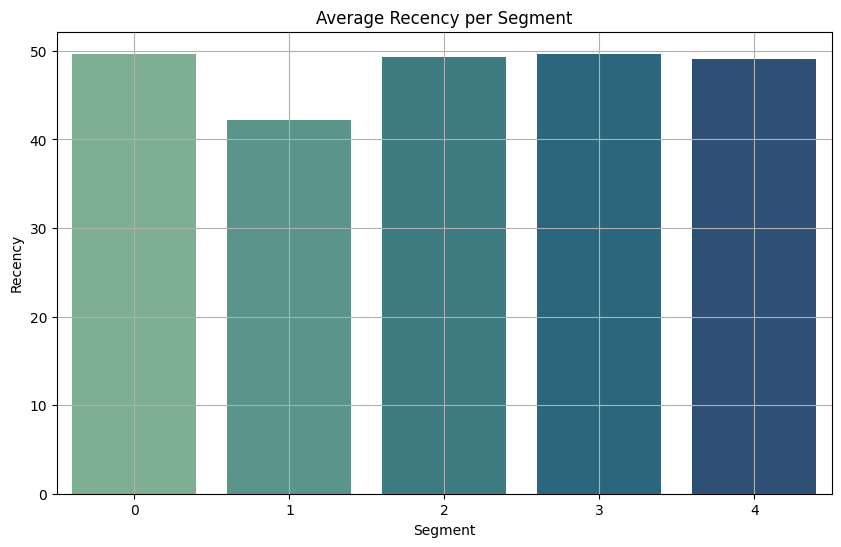

In [45]:
segment_profile = data.groupby('Segment').mean().round(2)

# Features you want to visualize
features = ['Income', 'Kidhome', 'Teenhome', 'Recency']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=segment_profile.index, y=segment_profile[feature], palette='crest')
    plt.title(f'Average {feature} per Segment')
    plt.xlabel('Segment')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()




We analyze how key customer attributes vary across different segments. This helps us understand the unique characteristics of each customer group and allows for better strategic planning.

The following bar charts display the **average values** of selected features for each segment:

- Income
- Number of Kids at Home
- Number of Teenagers at Home
- Recency of Last Purchase


## 📦 Customer Distribution per Segment

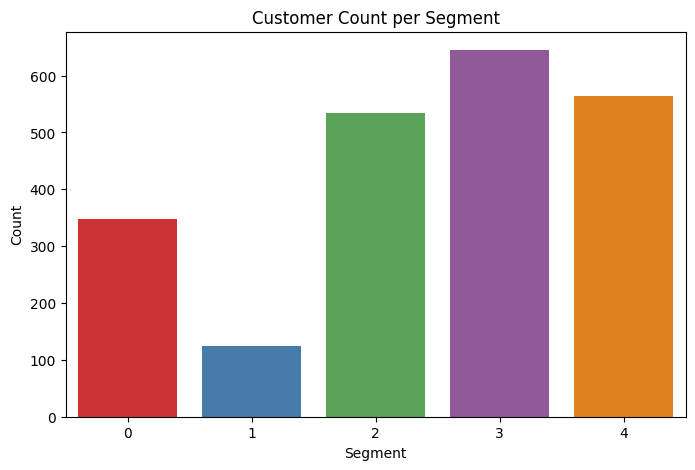

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=data, palette='Set1')
plt.title('Customer Count per Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


This bar plot shows how many customers belong to each segment. It helps assess the **size of each cluster**, which is useful for determining where to focus marketing or business resources.


# ⭐ Key Features of the Project

🔍 Data Cleaning & Preprocessing:
Handled missing values, removed irrelevant features, and converted categorical variables using Label Encoding.

📊 Exploratory Data Analysis (EDA):
Created insightful visualizations to understand the distribution of categorical and numerical features.

📆 Date Feature Engineering:
Extracted day, month, and year from the customer joining date (Dt_Customer), enhancing time-based analysis.

📉 Correlation Analysis:
Identified feature relationships using a heatmap to reduce redundancy and multicollinearity.

📦 Standardization:
Applied StandardScaler to normalize data before applying ML models.

🧠 Unsupervised Machine Learning:
Used K-Means Clustering to group customers into distinct segments.

🎯 Optimal Cluster Selection:
Employed the Elbow Method to choose the optimal number of clusters based on inertia.

🌀 Dimensionality Reduction:
Used t-SNE and PCA for 2D visualization of high-dimensional customer data.

🎨 Segment Visualization:
Visualized customer clusters using scatter plots and bar charts to interpret segment profiles.

📈 Business Insight Generation:
Profiled each segment based on income, age, recency, and family structure to help in marketing strategies.



# ✅ Conclusion

This customer segmentation project successfully demonstrates how unsupervised machine learning techniques can uncover valuable insights from complex customer data. By applying K-Means clustering, we identified distinct groups of customers with similar behaviors and demographics.

Key takeaways include:

Clear differentiation of customer segments based on income, age, purchasing patterns, and campaign responses.

Visualization with t-SNE and PCA helped in understanding the high-dimensional data in two dimensions.

The segmentation results provide actionable insights for targeted marketing strategies and personalized customer engagement.

Overall, this analysis enables businesses to optimize their marketing efforts, improve customer satisfaction, and increase profitability through data-driven decision making. Future enhancements could include incorporating additional data sources and experimenting with other clustering algorithms to further refine customer profiles.